In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('ggplot')

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5,1,'Distribution of Survival | 1 = Survived')

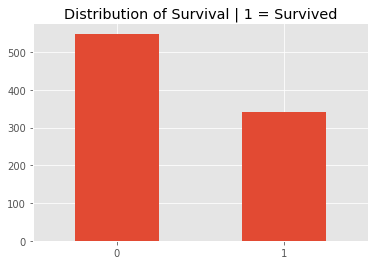

In [10]:
titanic['Survived'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Distribution of Survival | 1 = Survived')

Text(0.5,1,'Distribution of PClass')

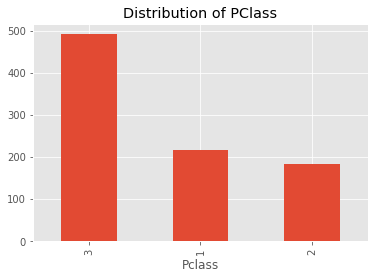

In [12]:
titanic['Pclass'].value_counts().plot(kind = 'bar')
plt.xlabel('Pclass')
plt.title('Distribution of PClass')

Text(0.5,1,'Distribution of Age')

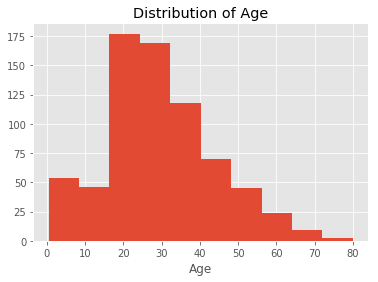

In [13]:
titanic['Age'].hist()
plt.xlabel('Age')
plt.title('Distribution of Age')

Text(0.5,1,'Embarkment Distribution')

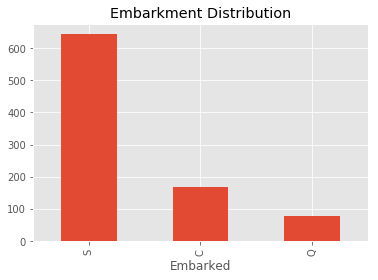

In [14]:
titanic['Embarked'].value_counts().plot(kind = 'bar')
plt.xlabel('Embarked')
plt.title('Embarkment Distribution')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

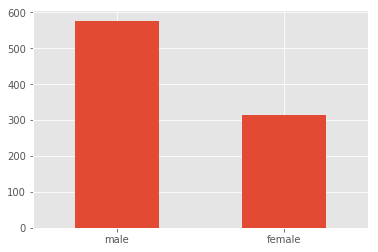

In [16]:
titanic['Sex'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

In [17]:
titanic[['Sex','Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
titanic[['Survived','Pclass']].groupby('Pclass',as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
titanic[['Survived','Embarked']].groupby('Embarked',as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [20]:
titanic[['Survived','Parch']].groupby('Parch',as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [21]:
titanic[['Survived','SibSp']].groupby('SibSp',as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5,1,'Gender and Survival')

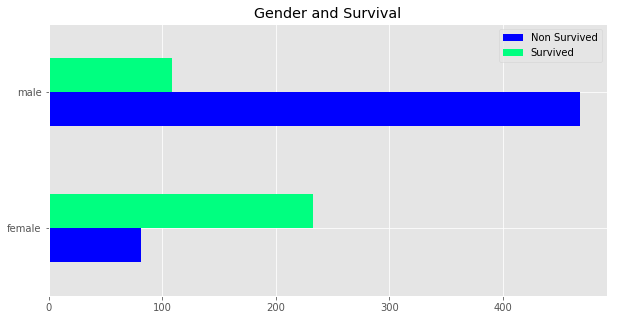

In [22]:
Sex = pd.DataFrame({'Survived': titanic['Sex'][titanic['Survived'] == 1].value_counts(), 
                    'Non Survived': titanic['Sex'][titanic['Survived']== 0].value_counts()})
Sex.plot.barh(figsize = (10,5), cmap = 'winter')
plt.title('Gender and Survival')

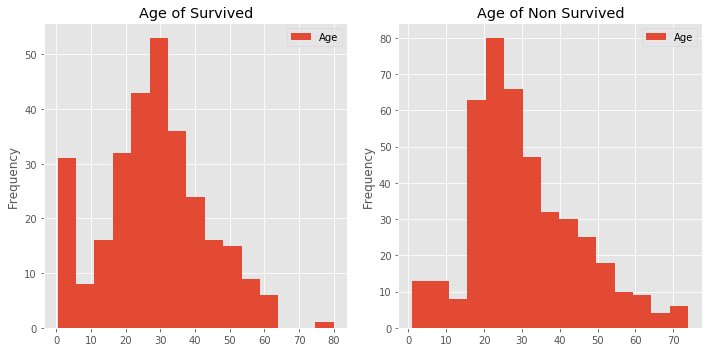

In [23]:
plt.figure(figsize = (10,5))
ax1 = plt.subplot2grid((1,2), (0,0), colspan = 1)
titanic['Age'][titanic['Survived'] == 1].plot(bins = 15,kind = 'hist',legend = True)
plt.title('Age of Survived')

ax2 = plt.subplot2grid((1,2),(0,1))
titanic['Age'][titanic['Survived'] == 0].plot(bins = 15,kind = 'hist',legend = True)
plt.title('Age of Non Survived')
plt.tight_layout()

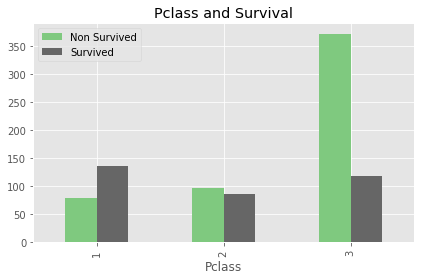

In [24]:
def Survival_category(category):
     dataframe = pd.DataFrame({'Survived' : titanic[category][titanic['Survived']== 1].value_counts(),
                                'Non Survived' : titanic[category][titanic['Survived']== 0].value_counts()})
     return dataframe.plot.bar(cmap = 'Accent')

Survival_category('Pclass')

plt.xlabel('Pclass')
plt.title('Pclass and Survival')

plt.tight_layout()

In [25]:
def Pclass_survival(Pclass):
    dataframe = pd.DataFrame({'Survived': titanic['Sex'][titanic['Pclass']==Pclass][titanic['Survived']==1].value_counts(),
                             'Non Survived': titanic['Sex'][titanic['Pclass']==Pclass][titanic['Survived']==0].value_counts()
                             })
    dataframe.plot.bar(cmap = 'coolwarm')
    plt.title('Pclass = {} | Survival'.format(Pclass))
    plt.xticks(rotation = 0)


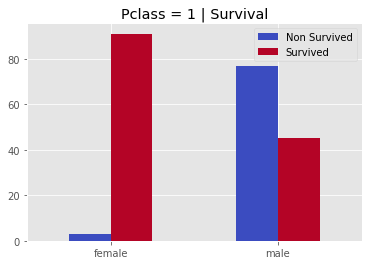

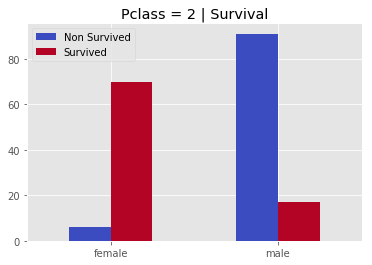

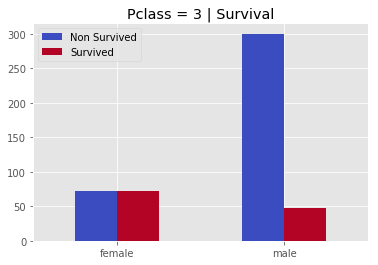

In [26]:
Pclass_survival(1)
Pclass_survival(2)
Pclass_survival(3)


Text(0.5,1,'Embarkment and Survival')

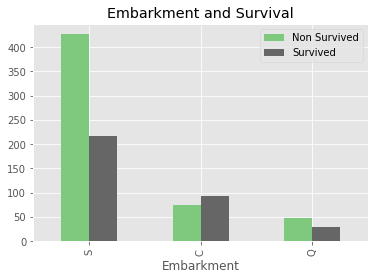

In [27]:
Survival_category('Embarked')

plt.xlabel('Embarkment')
plt.title('Embarkment and Survival')


In [28]:
def Embarkment_category(embarked, category):
    dataframe = pd.DataFrame({'Survived':titanic[category][titanic['Embarked'] == embarked][titanic['Survived'] == 1].value_counts(),
                             'Non Survived':titanic[category][titanic['Embarked'] == embarked][titanic['Survived'] == 0].value_counts()})
    return dataframe.plot.bar(stacked = True, cmap = 'summer')

Text(0.5,0,'Pclass')

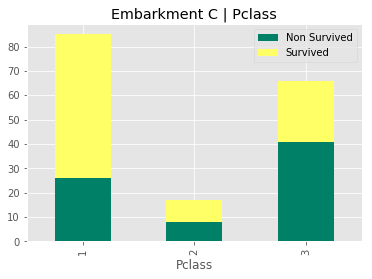

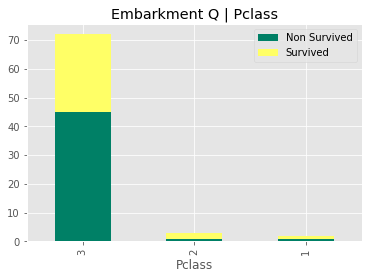

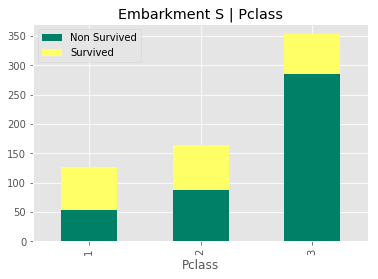

In [29]:
Embarkment_category('C', 'Pclass')
plt.title('Embarkment C | Pclass')
plt.xlabel('Pclass')

Embarkment_category('Q', 'Pclass')
plt.title('Embarkment Q | Pclass')
plt.xlabel('Pclass')

Embarkment_category('S', 'Pclass')
plt.title('Embarkment S | Pclass')
plt.xlabel('Pclass')


In [53]:
def embark(embarked):
    data = pd.DataFrame({
                    'Male':titanic['Pclass'][titanic['Survived']==1][titanic['Embarked'] == embarked][titanic['Sex']=='male'].value_counts()/titanic['Pclass'][titanic['Embarked'] == embarked][titanic['Sex']=='male'].value_counts(),
                    'Female':titanic['Pclass'][titanic['Survived']==1][titanic['Embarked'] == embarked][titanic['Sex']=='female'].value_counts()/titanic['Pclass'][titanic['Embarked'] == embarked][titanic['Sex']=='female'].value_counts(), 
                        }, index = (1,2,3))
    data['Male'].plot(xticks = data.index,legend = True, linestyle = '-',alpha = 1, color = 'g', marker = 'o')
    data['Female'].plot(legend = True, linestyle = '-',alpha = 0.8, color = 'b', marker = 'o',xlim = (0,4))
    plt.title('Embarkement = {} | Gender | Pclass'.format(embarked))
    plt.xlabel('Pclass')
    plt.ylabel('Survival Ratio')
    plt.tight_layout()

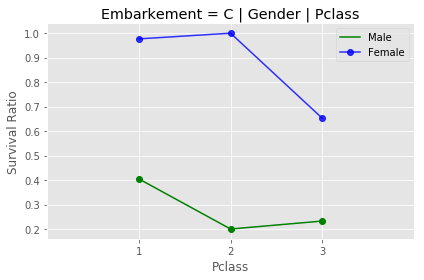

In [54]:
embark('C')

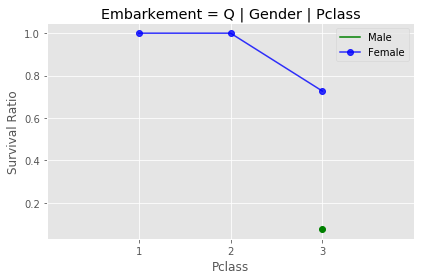

In [55]:
embark('Q')

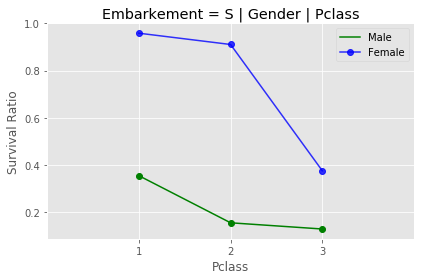

In [56]:
embark('S')